# Exercise 7: Global warming in the Netherlands?


The Dutch KNMI organization measures, among others, the temperature in the Netherlands. Complete datasets of recorded temperatures are available via https://www.knmi.nl/nederland-nu/klimatologie-metingen-en-waarnemingen . Of particular interest for this exercise in the 'average' temperature per month since 1906 corrected for changes in the location of stations and methods of measurement. See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt for more background information on these measurements. 

The data can be used as input for climate models and is available online as https://cdn.knmi.nl/knmi/asc/klimatologie/onderzoeksgegevens/CNT/tg_CNT.txt 

In this exercise we will use the advanced pandas library to handle the data. The fastest way to deal with this library is via the cookbook https://pandas.pydata.org/pandas-docs/stable/cookbook.html

It is not necessary to download the datafile it can be read directly from the internet using the pandas read_csv fucntion.

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('https://cdn.knmi.nl/knmi/asc/klimatologie/onderzoeksgegevens/CNT/tg_CNT.txt', skiprows=11, delimiter='\s+')
df.columns=df.columns.str.strip(',') #remove the strange comma from the column names
df.head()

YEAR      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0  1906  3.32429  2.29741  3.78348  7.65619  12.4297  14.1998  16.7496   
1  1907  1.51254  0.40494  4.58511  7.41965  12.5166  13.5531  13.8619   
2  1908 -1.24001  3.30636  3.43674  5.86811  12.9866  16.2455  16.6096   
3  1909  0.55002  0.29838  2.95708  8.53574  11.3026  12.9562  14.5315   
4  1910  3.27844  4.02948  5.25129  7.83671  12.4597  16.0278  15.1130   

       Aug      Sep       Oct      Nov      Dec  
0  16.9169  13.2947  11.69020  7.56198 -0.21912  
1  15.4620  13.7227  11.26630  5.63488  3.13986  
2  15.0095  13.3625   9.81094  4.28813  1.02190  
3  16.2449  12.9722  10.97730  3.93653  3.07201  
4  16.1327  13.2861  10.39700  3.35544  5.40469

## Example: plotting the average temperature for the month January

The dataset starts at 1906 and you can easily plot this data by calling the appropriate column from the pandas dataframe. I called the dataframe 'df' and call the data for the x-axis as 'df['YEAR']' and the y-column as 'df['Jan']' to create a plot of the average temperature for the month January from 1906 until now.

In [2]:
# plot settings 

import matplotlib.pyplot as plt
%matplotlib inline 

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

Text(0, 0.5, 'Temperature')

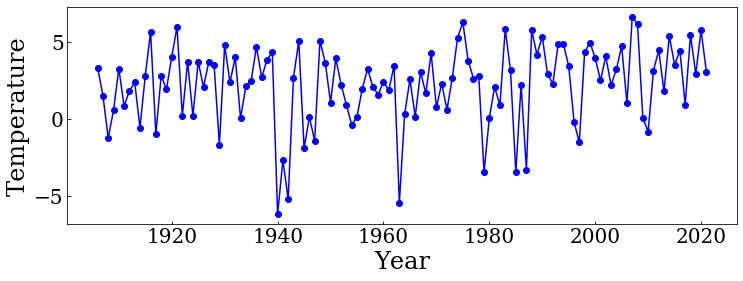

In [3]:
plt.figure(figsize=(12,4))
plt.plot(df['YEAR'], df['Jan'], ls='solid', marker='o', color='blue')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')

### Inspect the data first
*The last row in the datafile is incomplete and may cause trouble. The entries for the future are not a number 'NaN' (see below) and I hope (but did not check) that these are ignored when calculating an average. This happens unless you run this notebook in January.*

This issue can be avoided by dropping a row of data. using a command like: 

df=df.drop(112)

This command creates an new pandas dataframe named 'df2' that does not include row 112. You need to inspect the end of the data using the df.tail() command. (df.head() checks the top of the file). After dropping a column it is advised to check the new dataframe, i.e. use 

df.tail()

In [4]:
df.tail()

YEAR      Jan      Feb      Mar       Apr       May       Jun       Jul  \
111  2017  0.93280  5.11369  8.66613   8.28889  15.28172  18.50444  18.15753   
112  2018  5.44355  0.18690  4.65645  12.45889  16.71935  17.79889  21.43602   
113  2019  2.92581  5.97976  7.92581  10.84278  11.80054  18.78278  19.15323   
114  2020  5.75968  6.91667  6.78065  11.37167  13.27742  17.76889  17.11344   
115  2021  3.08065  4.11250  6.35591   6.46056  11.37742  18.71333  18.06667   

          Aug       Sep       Oct      Nov      Dec  
111  17.44677  13.71833  13.04624  6.70667  4.59247  
112  19.03226  14.94000  11.92151  6.62611  5.77688  
113  18.81398  14.61056  11.70538  6.15722  5.60269  
114  20.55806  15.32833  11.25000  8.57278  5.38495  
115  16.86344  15.85833  11.38548  6.54833  5.20753

In [5]:
# df = df.drop(114)  # Potentially needed if the last row in the dataframe contains NaN entries
# df.tail()

## Checking the monthly temperatures

### a) Combine the data to obtain the average temperature and standard deviation for each month over the period 1906-now

Text(0, 0.5, 'Average Temperature ($^\\circ$C)')

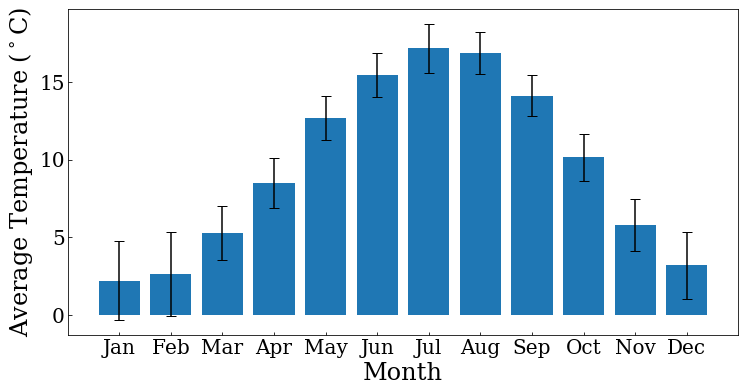

In [6]:
tmp=df.drop('YEAR',axis=1)
x=np.array(range(1,13,1)) # month number

plt.figure(figsize=(12,6))
plt.bar(x,tmp.mean(),yerr=tmp.std(), capsize=5)
plt.xticks(x,list(tmp.columns))
plt.xlabel('Month')
plt.ylabel('Average Temperature ($^\circ$C)')

As the earth revolves around the sun, the distance between earth and sun has a sinusoidal dependence on time due to the inclination of the rotation axis of the earth. 

### b) Construct a model and check if the average temperature per month can be described by a sinusoidal function by fitting the data to such a model. 

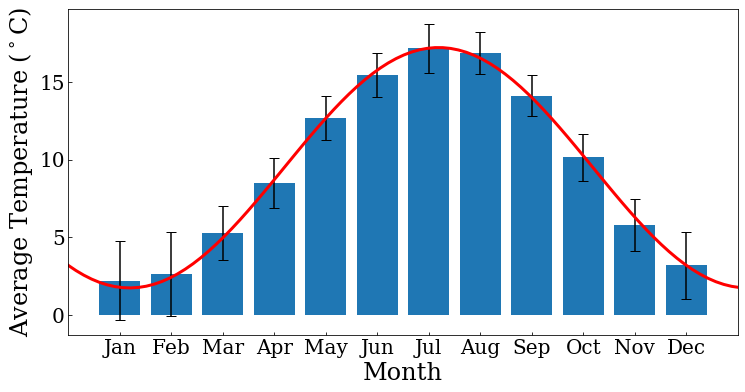

In [7]:
def tempNL(x, T0, Amp, offset):
    "Temperature in the Netherlands as a function of month. x=1 is January"
    return (T0+Amp*(np.sin((x-1-offset)*np.pi/12.0))**2)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(tempNL,x,tmp.mean(),sigma=tmp.std(),p0=(10,5,2))
                       
plt.figure(figsize=(12,6))
plt.bar(x,tmp.mean(),yerr=tmp.std(), capsize=5)
plt.xticks(x,list(tmp.columns))
plt.xlabel('Month')
plt.ylabel('Average Temperature ($^\circ$C)')
plt.xlim(0,13)

fine=np.linspace(0.,15,100) # Use a fine grid to get a smooth curve!
plt.plot(fine, tempNL(fine, *popt),  color='red', ls='solid', linewidth='3')

### c) What is the average temperature $T_{avg}$ in the Netherlands for the period 1906-now? Which month is the coldest month? Which month is the hottest?

In [8]:
print('The average lowest temperature in the Netherlands is %.2f +/- %.2f ' %(popt[0], pcov[0,0]**0.5))
print('The ammplitude is %.2f +/- %.2f ' %(popt[1], pcov[1,1]**0.5))
print('The offset (0 = Jan 1, 1 = Feb 1, etc.) is %.2f +/- %.2f ' %(popt[2], pcov[2,2]**0.5))

print('\nThe average lowest temperature in the Netherlands is %.2f +/- %.2f ' % 
      (popt[0]+0.5*popt[1], (pcov[0,0]+0.5*pcov[1,1])**0.5))

The average lowest temperature in the Netherlands is 1.75 +/- 0.19 
The ammplitude is 15.49 +/- 0.27 
The offset (0 = Jan 1, 1 = Feb 1, etc.) is 0.19 +/- 0.03 

The average lowest temperature in the Netherlands is 9.49 +/- 0.27 


Average temperature is 9.4±0.3 $^\circ$C, with the coldest month being January (January 7 to be exact) and the hottest somewhere July (6 months later by definition of the fit function). 

### d) Is the data of KNMI well described by the simple sinusoidal model based on the value of $\chi^2$?

In [9]:
dof=len(x)-len(popt)
# We will need the minimum value of chi-squared later
chisqmin = np.sum(((tmp.mean()-tempNL(np.array(x),popt[0],popt[1],popt[2]))/tmp.std())**2)
print('\nNormalized value of chi square = %.2f with %d degrees of freedom'% (chisqmin,dof))


Normalized value of chi square = 0.30 with 9 degrees of freedom


The normalized $\chi^2$ value is very small because I took the year-to-year variations as a measure for the error in the average temperature. The fit goes very nicely through this average.  

These are the fluctuations. The error in the mean is probably $\sigma/\sqrt N$ where $N$ is the number of years. Hence, the value of $\chi^2$ should be a factor $N$ larger. This gives a rather high number.

**My answer to the question is therefore: No, this is not a good model it does not capture the finer details of fluctuations**

In [10]:
print('\nBetter estimate of the normalized value of chi square = %.2f with %d degrees of freedom'% 
      (len(df['Jan'])*chisqmin,dof))


Better estimate of the normalized value of chi square = 34.67 with 9 degrees of freedom


## Global warming: analyzing the average temperature in the Netherlands since 1906

A much more heated debate is the issue of global warming. For a more solid scientific basis for the effect I refer to online information http://climate.nasa.gov/. Let’s try to look at local warming using the data from KNMI.

### e) Calculate the average annual temperature by averaging over all 12 months for each year and plot this average annual temperature for the period 1906-now

If all is well you should get some noisy data, showing a gradual, slow increase with time. 

In [11]:
df['avg']=df[list(df.columns)[1:13]].mean(axis=1)
df.head()

YEAR      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0  1906  3.32429  2.29741  3.78348  7.65619  12.4297  14.1998  16.7496   
1  1907  1.51254  0.40494  4.58511  7.41965  12.5166  13.5531  13.8619   
2  1908 -1.24001  3.30636  3.43674  5.86811  12.9866  16.2455  16.6096   
3  1909  0.55002  0.29838  2.95708  8.53574  11.3026  12.9562  14.5315   
4  1910  3.27844  4.02948  5.25129  7.83671  12.4597  16.0278  15.1130   

       Aug      Sep       Oct      Nov      Dec       avg  
0  16.9169  13.2947  11.69020  7.56198 -0.21912  9.140428  
1  15.4620  13.7227  11.26630  5.63488  3.13986  8.589965  
2  15.0095  13.3625   9.81094  4.28813  1.02190  8.392156  
3  16.2449  12.9722  10.97730  3.93653  3.07201  8.194538  
4  16.1327  13.2861  10.39700  3.35544  5.40469  9.381029

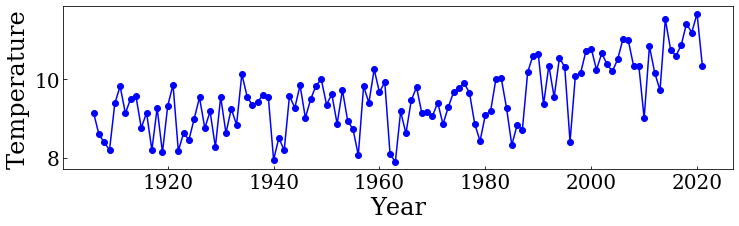

In [12]:
plt.figure(figsize=(12,3))
plt.plot(df['YEAR'],df['avg'], ls='solid', marker='o', color='blue')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.show()

### f) Fit the data to a straight line and find the increase in average temperature in the Netherlands for the period 1906-now.

a = 0.0158 +/- 0.0018
b = -21.58 +/- 3.59


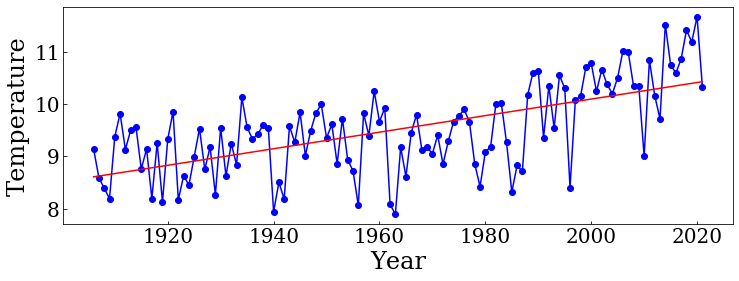

In [13]:
def model(x,a,b):
    "linear model to explain increase in temperature"
    return (a*x+b)

popt, pcov = curve_fit(model,df['YEAR'],df['avg'])

print('a = %.4f +/- %.4f' %(popt[0], pcov[0,0]**0.5))
print('b = %.2f +/- %.2f' %(popt[1], pcov[1,1]**0.5))

plt.figure(figsize=(12,4))
plt.plot(df['YEAR'],df['avg'], ls='solid', marker='o', color='blue')
plt.plot(df['YEAR'],model(df['YEAR'],*popt), ls='solid', color='red')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.show()

#### Aternative model. Better?

a = 0.000144 +/- 0.000015
b = 8.883 +/- 0.086


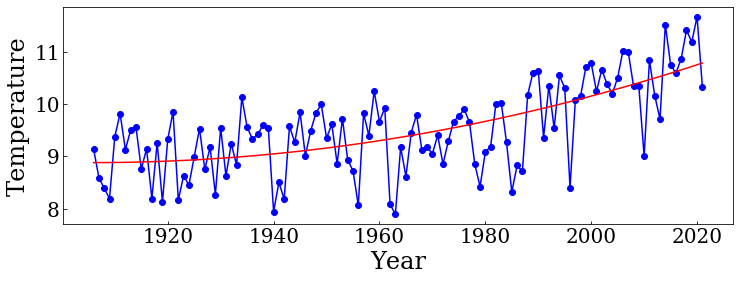

In [14]:
def model(x,a,b):
    "linear model to explain increase in temperature"
    return (a*(x-1906)**2+b)

popt, pcov = curve_fit(model,df['YEAR'],df['avg'])

print('a = %.6f +/- %.6f' %(popt[0], pcov[0,0]**0.5))
print('b = %.3f +/- %.3f' %(popt[1], pcov[1,1]**0.5))

plt.figure(figsize=(12,4))
plt.plot(df['YEAR'],df['avg'], ls='solid', marker='o', color='blue')
plt.plot(df['YEAR'],model(df['YEAR'],*popt), ls='solid', color='red')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.show()

Consider the hypothesis that there is no measurable effect of local warming, assuming that the trend in the data is due to some random statistical fluctuations. 

### g) Test this hypothesis by constructing a model and looking at the goodness of fit.

Estimate of fluctuations in temperature (1906-1986) = 0.60
Tavg = 9.15 (1906-1986)
Tavg = 9.52 (all years)
Normalized value of chi square = 231.62 with 115 degrees of freedom


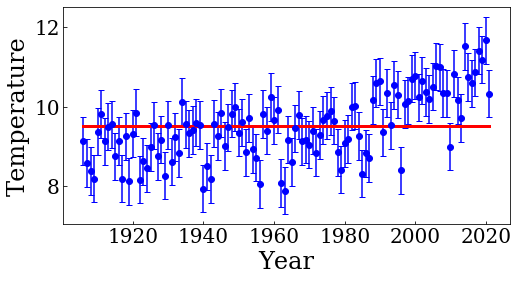

In [15]:
error=df['avg'][1:80].std() #estimate of the error on the average using the data 1906-1986
print("Estimate of fluctuations in temperature (1906-1986) = %.2f" % error)
print ("Tavg = %.2f (1906-1986)" % df['avg'][1:80].mean())
print ("Tavg = %.2f (all years)" % df['avg'].mean())

plt.figure(figsize=(8,4))
plt.errorbar(df['YEAR'],df['avg'], yerr=error,ls='none', marker='o', color='blue', capsize=3)
plt.plot(df['YEAR'],np.full(len(df['YEAR']),df['avg'].mean()), ls='solid', color='red', linewidth='3')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')

dof=len(df['YEAR'])-1
# We will need the minimum value of chi-squared later
chisqmin = np.sum(((df['avg']-df['avg'].mean())/error)**2)
print('Normalized value of chi square = %.2f with %d degrees of freedom' %(chisqmin,dof))

This seems to show that the rise is indeed significant. It shows that the points are further away from the straight line than what we would expect based on the fluctuations observed in the first 80 years ($\sigma$= 0.6). This is a rather arbitrary criterion, but you can play with it if you want.

Below is an **alternative approach** based on the idea that the reduced chi-square per degree of freedom should be one. I compute this quantity by comparing the running average to the data and compute $\chi^2$. This is the same as calculating the variance of the data and plotting this. I normalized to the variance for the period 1906-1986. Shaded areas are a 2-sigma and 5-sigma error margin. Again this is based on the **assumption** that the temperature is constant over a significant part of the data. What this shows is that the variance of the temperature in the Netherlands between 2000-2020 is larger than the variance between 1906-1986. If we look at a plot of the temperature we would say that this is due to a shift or draft of the data - allmost all datapoints after 1990 are above the average.

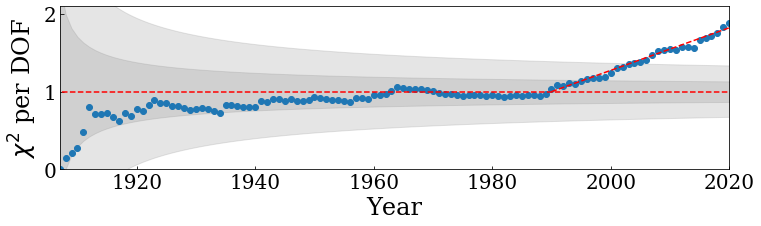

In [16]:
chiarray=np.ones(len(df['YEAR']))
for i in range(len(df['YEAR'])):
    chiarray[i] = (1.0/error**2)*(1.0/(i+1))*np.sum(((df['avg'][0:i]-df['avg'][0:i].mean())**2))

plt.figure(figsize=(12,3))
plt.plot(df['YEAR'],chiarray, ls='none', marker='o')
plt.plot(df['YEAR'],np.ones(len(chiarray)), ls='dashed', color='red')

plt.plot((1990,2021),(1.0,1.85), ls='dashed', color='red') #suggestive line

plt.fill_between(df['YEAR'],1.0+2.0/(np.sqrt(2*(df['YEAR']-1906))),1.0-2.0/(np.sqrt(2*(df['YEAR']-1906))), 
                 color='grey', alpha=0.2)
plt.fill_between(df['YEAR'],1.0+5.0/(np.sqrt(2*(df['YEAR']-1906))),1.0-5.0/(np.sqrt(2*(df['YEAR']-1906))), 
                 color='grey', alpha=0.2)
plt.xlabel('Year') # Axes have labels!
plt.ylabel('$\chi^2$ per DOF')
plt.ylim(0,2.1)
plt.xlim(1907,2020)
plt.show()


#### Flashback: Making better figures

For these kind of figures the aspect ratio makes quite a difference...

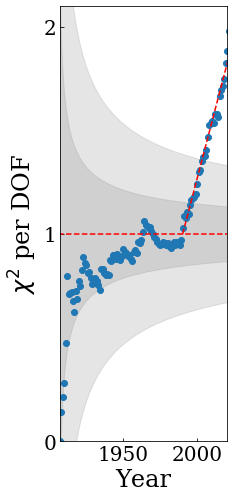

In [17]:
plt.figure(figsize=(3,8))
plt.plot(df['YEAR'],chiarray, ls='none', marker='o')
plt.plot(df['YEAR'],np.ones(len(chiarray)), ls='dashed', color='red')

plt.plot((1990,2021),(1.0,1.85), ls='dashed', color='red') #suggestive line

plt.fill_between(df['YEAR'],1.0+2.0/(np.sqrt(2*(df['YEAR']-1906))),1.0-2.0/(np.sqrt(2*(df['YEAR']-1906))), 
                 color='grey', alpha=0.2)
plt.fill_between(df['YEAR'],1.0+5.0/(np.sqrt(2*(df['YEAR']-1906))),1.0-5.0/(np.sqrt(2*(df['YEAR']-1906))), 
                 color='grey', alpha=0.2)
plt.xlabel('Year') # Axes have labels!
plt.ylabel('$\chi^2$ per DOF')
plt.ylim(0,2.1)
plt.yticks((0,1,2))
plt.xlim(1907,2020)
plt.show()


*For a solid scientific discussion on the origin of the trend consider that the effect of greenhouse gasses in the atmosphere https://en.wikipedia.org/wiki/Greenhouse_gas and the fact that the solar activity varies over time https://en.wikipedia.org/wiki/Solar_cycle. Also consider that the average temperature in the Netherlands might be a very poor measure of the global average temperature.*